In [55]:
import numpy as np
import uproot 
import matplotlib.pyplot as plt
from Hist_plot import * 
from peak_fit import * 
from scipy.optimize import curve_fit

In [2]:
Energy1 = []
for arrays in uproot.iterate("multi_run/R1/FILTERED/*.root","Data_F;4","Energy",outputtype=list):
    
    for x in arrays:
        Energy1.extend(x)
        

        
Energy2 = []
for arrays in uproot.iterate("multi_run/R2/FILTERED/*.root","Data_F;4","Energy",outputtype=list):
    
    for x in arrays:
        Energy2.extend(x)
        
        
Energy3 = []
for arrays in uproot.iterate("multi_run/R3/FILTERED/*.root","Data_F;4","Energy",outputtype=list):
    
    for x in arrays:
        Energy3.extend(x)
        
        

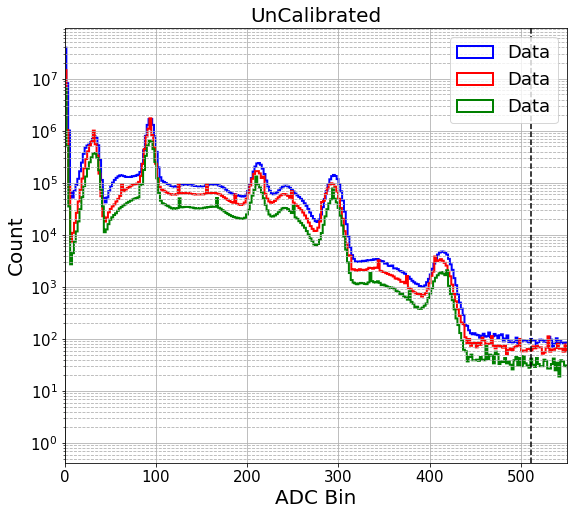

In [3]:
hist_mult(Energy1,Energy2,Energy3,2600)

In [4]:
c0 = -80.65
c1 = 6.346

c02 = -83.46
c12 = 6.39

c03 = -87.74
c13 = 6.376
 #calibrated
E1_cal = []
E2_cal = []
E3_cal = []

for x,y,z in zip(Energy1,Energy2,Energy3):

    E1 = c1*x + c0
    E1_cal.append(E1)

    E2 = c12*y + c02
    E2_cal.append(E2)


    E3 = c13*z + c03
    E3_cal.append(E3)
    

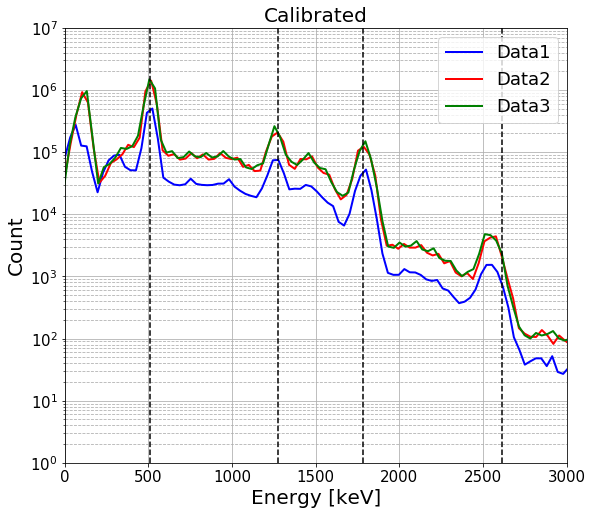

In [5]:
hist_mult_cal(E1_cal,E2_cal,E3_cal,1000,0,3000,10**0,10**7)

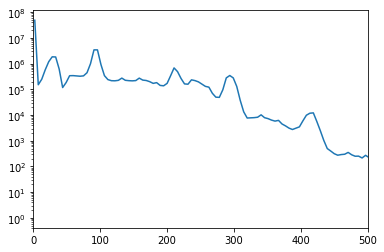

In [23]:
y,binedges = np.histogram(Energy1,bins = 1000)

bincenters = 0.5*(binedges[1:]+binedges[:-1])

plt.plot(bincenters,y,'-')
plt.yscale('log')
plt.xlim(0,500)
plt.show()

In [7]:
from scipy.signal import find_peaks

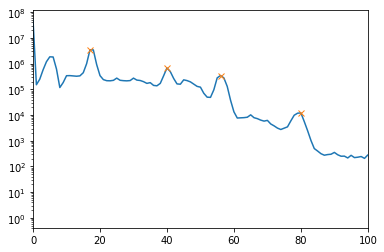

In [49]:
Y = y[0:100]
peaks, properties = find_peaks(Y,distance = 15,prominence = 1000,width = 2.1)

plt.figure()
plt.plot(y)
plt.plot(peaks,y[peaks],'x')
plt.yscale('log')
plt.xlim(0,100)
plt.show()


In [52]:
ADC_loc = []
for x in peaks: 
    a = bincenters[x]
    ADC_loc.append(a)
    
print(ADC_loc)

[91.0, 210.60000000000002, 293.8, 418.6]


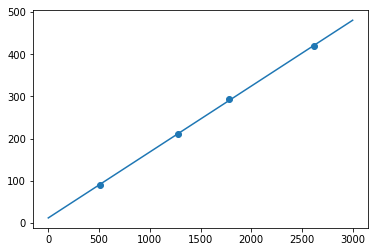

In [61]:
EN = [511,1274,1785,2614]

def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

A,B = curve_fit(f, EN, ADC_loc)[0]

fit = []
z = np.arange(0,3000)
for x in z:
    y = A*x + B
    fit.append(y)


plt.figure()
plt.scatter(EN,ADC_loc)
plt.plot(z,fit)
plt.show()

In [ ]:
E1_cal = []
for x in Energy1:   
    E1 = A*x + B
    E1_cal.append(E1)
    

    
